In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense

In [3]:
df = pd.read_csv('./chicken.csv')

df = df.set_index('index')

df.head()

,value
index,
2001-08,65.58
2001-09,66.48
2001-10,65.70
2001-11,64.33
2001-12,63.23


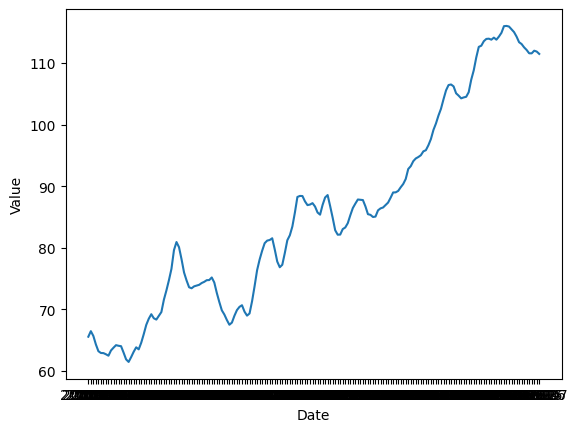

In [4]:
plt.plot(df['value'])

plt.xlabel('Date')
plt.ylabel('Value');

In [5]:
window1 = df.shift(1)
window1 = window1.rename(columns={'value': 'L1'})

window1.head()

,L1
index,
2001-08,NaN
2001-09,65.58
2001-10,66.48
2001-11,65.70
2001-12,64.33


In [6]:
window2 = df.shift(2)
window2 = window2.rename(columns={'value': 'L2'})

window2.head()

,L2
index,
2001-08,NaN
2001-09,NaN
2001-10,65.58
2001-11,66.48
2001-12,65.70


In [7]:
window3 = df.shift(3)
window3 = window3.rename(columns={'value': 'L3'})

window3.head()

,L3
index,
2001-08,NaN
2001-09,NaN
2001-10,NaN
2001-11,65.58
2001-12,66.48


In [8]:
window4 = df.shift(4)
window4 = window4.rename(columns={'value': 'L4'})

window4.head()

,L4
index,
2001-08,NaN
2001-09,NaN
2001-10,NaN
2001-11,NaN
2001-12,65.58


In [9]:
df_plain = df.copy()

df_plain.rename(columns={'value': 'Data'}, inplace=True)

df_plain['L1'] = window1['L1'] 
df_plain['L2'] = window2['L2'] 
df_plain['L3'] = window3['L3']
df_plain['L4'] = window4['L4']

df_plain.head()

,Data,L1,L2,L3,L4
index,,,,,
2001-08,65.58,NaN,NaN,NaN,NaN
2001-09,66.48,65.58,NaN,NaN,NaN
2001-10,65.70,66.48,65.58,NaN,NaN
2001-11,64.33,65.70,66.48,65.58,NaN
2001-12,63.23,64.33,65.70,66.48,65.58


In [10]:
df_log = np.log(df_plain)

df_log.head()

,Data,L1,L2,L3,L4
index,,,,,
2001-08,4.183271,NaN,NaN,NaN,NaN
2001-09,4.196901,4.183271,NaN,NaN,NaN
2001-10,4.185099,4.196901,4.183271,NaN,NaN
2001-11,4.164026,4.185099,4.196901,4.183271,NaN
2001-12,4.146779,4.164026,4.185099,4.196901,4.183271


In [11]:
index = df_log.reset_index()
index = index['index']

In [12]:
df_log = df_log[4:]

df_log.head()

,Data,L1,L2,L3,L4
index,,,,,
2001-12,4.146779,4.164026,4.185099,4.196901,4.183271
2002-01,4.142182,4.146779,4.164026,4.185099,4.196901
2002-02,4.141864,4.142182,4.146779,4.164026,4.185099
2002-03,4.138840,4.141864,4.142182,4.146779,4.164026
2002-04,4.135167,4.138840,4.141864,4.142182,4.146779


In [13]:
def min_max_scaler(unit, df, column):
    return (unit - np.min(df[column])) / (np.max(df[column]) - np.min(df[column]))

In [14]:
df_log['Data'] = df_log['Data'].apply(lambda x: min_max_scaler(x, df_log, 'Data'))

df_log['L1'] = df_log['L1'].apply(lambda x: min_max_scaler(x, df_log, 'L1'))
df_log['L2'] = df_log['L2'].apply(lambda x: min_max_scaler(x, df_log, 'L2'))
df_log['L3'] = df_log['L3'].apply(lambda x: min_max_scaler(x, df_log, 'L3'))
df_log['L4'] = df_log['L4'].apply(lambda x: min_max_scaler(x, df_log, 'L4'))

df_log.head()

,Data,L1,L2,L3,L4
index,,,,,
2001-12,0.043963,0.071137,0.104337,0.122932,0.101457
2002-01,0.036721,0.043963,0.071137,0.104337,0.122932
2002-02,0.036220,0.036721,0.043963,0.071137,0.104337
2002-03,0.031455,0.036220,0.036721,0.043963,0.071137
2002-04,0.025668,0.031455,0.036220,0.036721,0.043963


In [15]:
train = df_log.iloc[:170]

train.tail()

,Data,L1,L2,L3,L4
index,,,,,
2015-09,0.986359,0.992649,0.998641,1.000000,0.999457
2015-10,0.976326,0.986359,0.992649,0.998641,1.000000
2015-11,0.963729,0.976326,0.986359,0.992649,0.998641
2015-12,0.959554,0.963729,0.976326,0.986359,0.992649
2016-01,0.952011,0.959554,0.963729,0.976326,0.986359


In [16]:
test = df_log.iloc[170:]

test

,Data,L1,L2,L3,L4
index,,,,,
2016-02,0.946119,0.952011,0.959554,0.963729,0.976326
2016-03,0.938512,0.946119,0.952011,0.959554,0.963729
2016-04,0.938370,0.938512,0.946119,0.952011,0.959554
2016-05,0.944432,0.938370,0.938512,0.946119,0.952011
2016-06,0.942461,0.944432,0.938370,0.938512,0.946119
2016-07,0.937099,0.942461,0.944432,0.938370,0.938512


In [17]:
X_train, y_train = train[['L1', 'L2', 'L3', 'L4']], train['Data']

In [18]:
X_test, y_test = test[['L1', 'L2', 'L3', 'L4']], test['Data']

In [19]:
model = Sequential([
    SimpleRNN(32, input_shape=(4, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 0.0643
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 10/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 11/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/500
6/6 [==============================] - 0s 802us/step - loss: 0.0034
Epoch 13/500
6/6 [==============================] - 0s 1ms/

In [ ]:
def restore_dataset(dataset):
    inputs = []
    targets = []
    for batch in dataset:
        inputs_a, targets_a = batch
        inputs_a = inputs_a.numpy()
        targets_a = targets_a.numpy()
        for i in range(0, len(inputs_a)):
            inputs.append(inputs_a[i])
            targets.append(targets_a[i][0])

    inputs = np.array(inputs)
    targets = np.array(targets)

    return inputs, targets

In [ ]:
# ini parameternya apa ya? itu di preprocessing.py ada alurnya sih
# restore_dataset(dataset)

Text(0, 0.5, 'Error Rate')

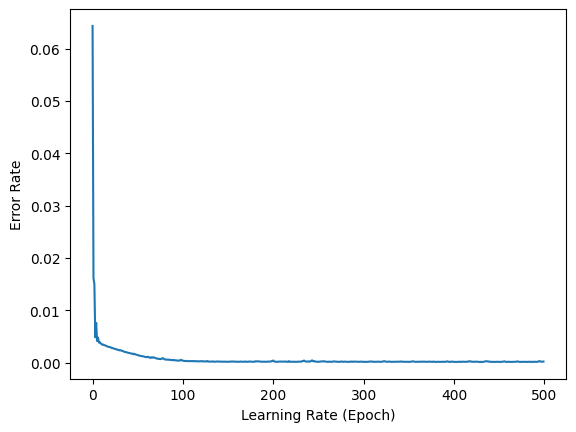

In [20]:
plt.plot(history.history['loss'])

plt.xlabel('Learning Rate (Epoch)')
plt.ylabel('Error Rate')

In [21]:
y_pred_train = model.predict(X_train)

6/6 [==============================] - 0s 3ms/step


In [22]:
print('R squared:', r2_score(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MAPE:', mean_absolute_percentage_error(y_train, y_pred_train))

R squared: 0.9965661444209324
MSE: 0.0002794912502881341
MAE: 0.013835147817610983
MAPE: 288381789412.96045


Text(0.5, 0, 'Date')

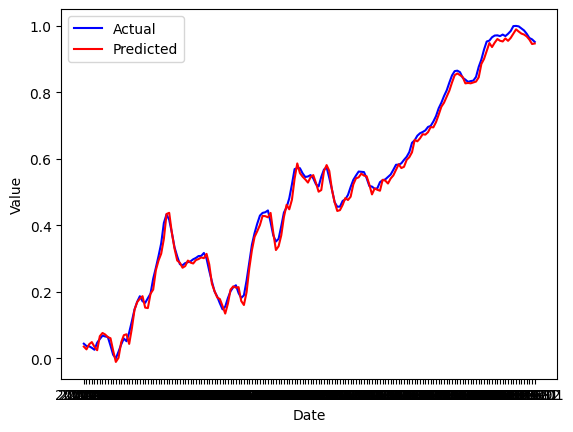

In [23]:
plt.plot(y_train, label="Actual", color='blue')
plt.plot(y_pred_train, label="Predicted", color='red')

plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')

In [24]:
y_pred_test = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [25]:
print('R squared:', r2_score(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_test))

R squared: -6.81616502103946
MSE: 8.895210221364763e-05
MAE: 0.00836216634453211
MAPE: 0.008883632231289178


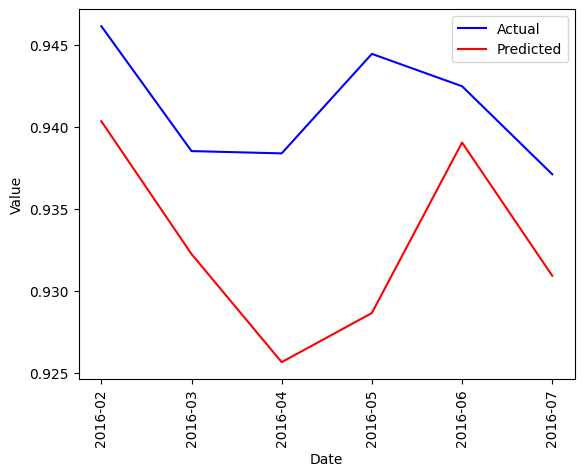

In [26]:
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred_test, label="Predicted", color='red')

plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(rotation=90);